Null Hypothesis (H0): All continents have the same variance (seasonality).

Alternative Hypothesis (H1): At least one continent has different variance.


at first, we analyzed monthly averages (n=12 per continent). However, Levene's Test for homogeneity of variance was underpowered (p=0.085), failing to detect the obvious visual differences in seasonality.

We use weekly data averaged across 2024 and 2025. This makes our sample size to ~52 points per continent, providing sufficient statistical power to detect differences in variance (seasonality).

In [18]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv('Question3/preprocessed_data/df_long.csv')

df_filtered = df[df['year'].isin([2024, 2025])].copy()

df_weekly = df_filtered.groupby(['continent', 'week_of_year'])['tourism_index'].mean().reset_index()

print(f"Data points per continent: {len(df_weekly) / df_weekly['continent'].nunique()} (Weeks 1-52)")
print(df_weekly.head())

Data points per continent: 52.0 (Weeks 1-52)
  continent  week_of_year  tourism_index
0    Africa             1          0.310
1    Africa             2          0.320
2    Africa             3          0.305
3    Africa             4          0.215
4    Africa             5          0.275


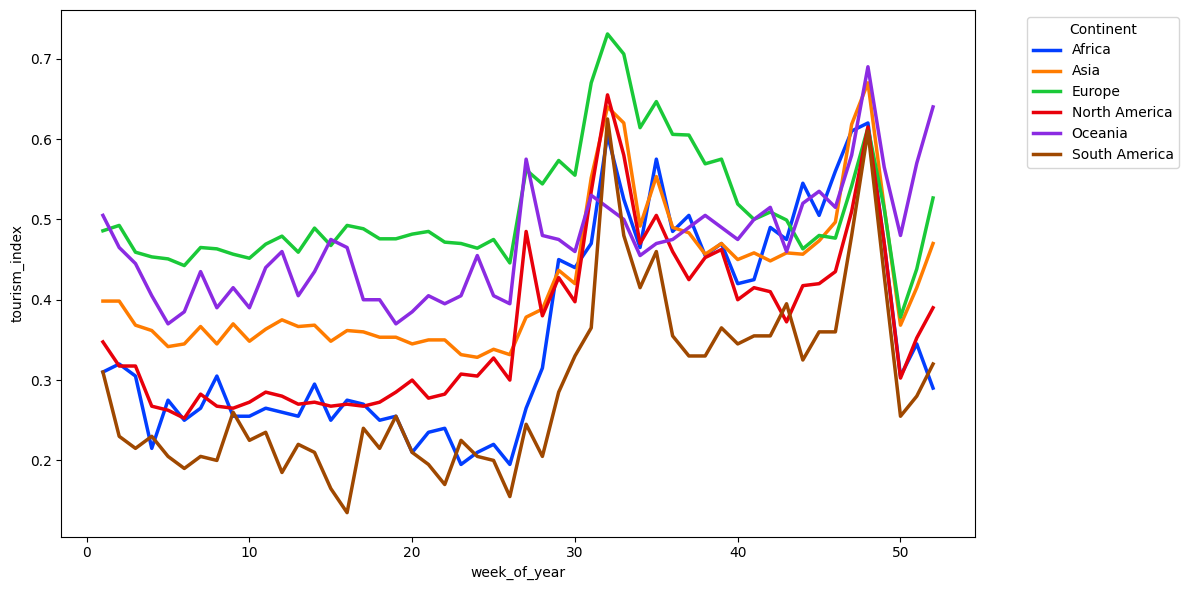

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_weekly, x='week_of_year', y='tourism_index', hue='continent', palette='bright', linewidth=2.5)

plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:

groups = [df_weekly[df_weekly['continent'] == c]['tourism_index'] for c in df_weekly['continent'].unique()]
stat, p_levene = stats.levene(*groups)

print(f"Levene's Statistic={stat}, p-value={p_levene}")

alpha = 0.05
if p_levene < alpha:
    print("Reject Null Hypothesis (H0).")
else:
    print("Fail to Reject H0.")

Levene's Statistic=5.550705572505142, p-value=6.538957038206465e-05
Reject Null Hypothesis (H0).


In [20]:

f_stat, p_anova = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_anova:.5e}")

if p_anova < alpha:
    print("Reject Null Hypothesis (H0).")
else:
    print("Fail to Reject H0.")

F-statistic: 35.5318
p-value: 1.24273e-28
Reject Null Hypothesis (H0).


In [21]:
tukey = pairwise_tukeyhsd(endog=df_weekly['tourism_index'],
                          groups=df_weekly['continent'],
                          alpha=0.05)

print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       Africa          Asia   0.0621 0.0152  0.0076  0.1165   True
       Africa        Europe   0.1521    0.0  0.0976  0.2065   True
       Africa North America   0.0086 0.9976 -0.0459  0.0631  False
       Africa       Oceania   0.1086    0.0  0.0541   0.163   True
       Africa South America  -0.0687 0.0047 -0.1231 -0.0142   True
         Asia        Europe     0.09    0.0  0.0355  0.1445   True
         Asia North America  -0.0534  0.058 -0.1079   0.001  False
         Asia       Oceania   0.0465 0.1432  -0.008   0.101  False
         Asia South America  -0.1307    0.0 -0.1852 -0.0762   True
       Europe North America  -0.1435    0.0 -0.1979  -0.089   True
       Europe       Oceania  -0.0435 0.2011  -0.098   0.011  False
       Europe South America  -0.2207    0.0 -0.2752 -0.1662   

some countries are significantly more affected by seasonal trends than other regions